## PCA using eigendecomposition from scratch

* Mar 18, 2021 

* Seoul National Univ. - Freshman Seminar (2021 Spring)  

Convert MATLAB code to Python ([MATLAB code](https://github.com/hkleebrain/Dimensionality_reduction))b

Text(0.5, 1.0, 'PCA')

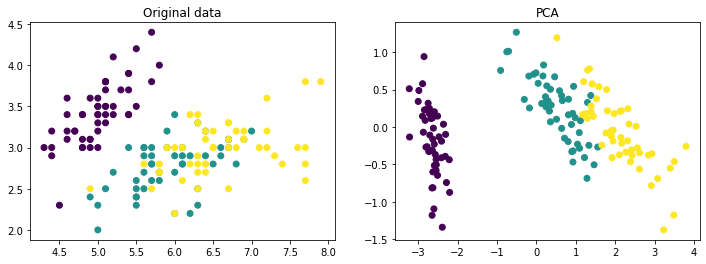

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Load dataset
iris = datasets.load_iris()
meas = iris.data # measurements
species = iris.target
n, p = meas.shape

# Plot original data
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(meas[:,0], meas[:,1], c=species) # plotting first two features of meas
plt.title('Original data')
# adding legend shall make code intricate or change the current MATLAB style, so it's excluded

### PCA
# When a new value is re-assigned to the same variable in the original MATLAB code,
# instead of re-assigning (and losing the previous value),
# I created a new variable by adding '_'. (e.g. D -> D_ -> D__)

# Centering
means = np.mean(meas, axis=0)
X = meas - np.array([means for _ in range(n)])

# Covariance matrix
C = np.cov(X, rowvar=False)

# Eigendecompsition of C
D, U = np.linalg.eig(C) # D for eigenvalues, U for eigenvectors
# each column of U is a normalized eigenvector

# Eigenvalues
D_ = np.zeros((n,n), dtype = np.complex) # D_ is a diagonal matrix whose main diagonal is eignevalues
np.fill_diagonal(D_, D)

# Sort eigenvectors in the descending order of eigenvalues
idx = np.argsort(D)[::-1] # descending order
U_ = np.column_stack(tuple([U[:,i] for i in idx]))
D__ = np.column_stack(tuple([D_[:,i] for i in idx]))

# Projection to the principal components
Y = np.dot(X, U_)[:,:2]

# Plot the results of PCA
plt.subplot(1,2,2)
plt.scatter(Y[:,0], Y[:,1], c=species)
plt.title('PCA')
